In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from scipy import stats
import warnings
import random

#suppress warnings
warnings.filterwarnings('ignore')

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (12,7.5)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

## Homework 5
### Problem 1
First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest  σ , say in the range 2-5. Create a million background events.

Now we need to make some signal. Let us choose to make signals of random strength on the interval of 0-20. Now it is critically important that you throw these using a uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 20). Mathematically this is the  P(signal)  in the equation. If you use another way of simulating signals that does not have a uniform distribution, you are injecting an implicit prior (very, very bad).

Now add your signal to your background to create fake data readings. Since you know what the true signal was for each data reading, and you used a flat prior, you now have  P(data|signal)P(signal) .

Now make one of the 2D histograms as shown in class. Here we want to histogram the signal vs. the simulated data readings. There are a couple of ways to do this, but it will be easier later if you define your bin edges explicitly, make a histogram, then plot it. Here is the code I used for the plot in class:

-16.091585542083166
36.04151111012174


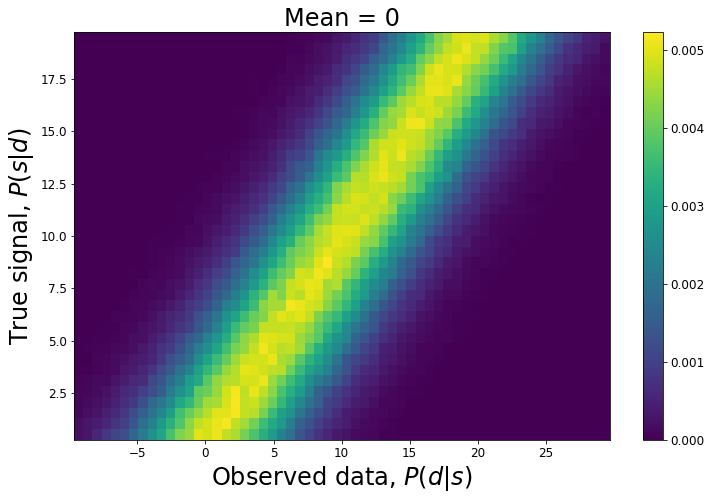

In [2]:
bkgd = stats.norm.rvs(loc=0, scale=4, size=int(1e6))
signal = stats.uniform.rvs(loc=0, scale=20, size=int(1e6))
data = bkgd + signal

print(min(data))
print(max(data))

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-10,30,60)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.title('Mean = 0', fontsize = 24)
plt.colorbar()

Now to explore this we can take slices of the above. We can look at our array edges and pick a vertical or horizontal stripe.
#### Problem 1b
Select a true injected signal and plot  P(d|s) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. [Hint: this was also shown in class.]

Text(0.5, 0, 'Observed Signal')

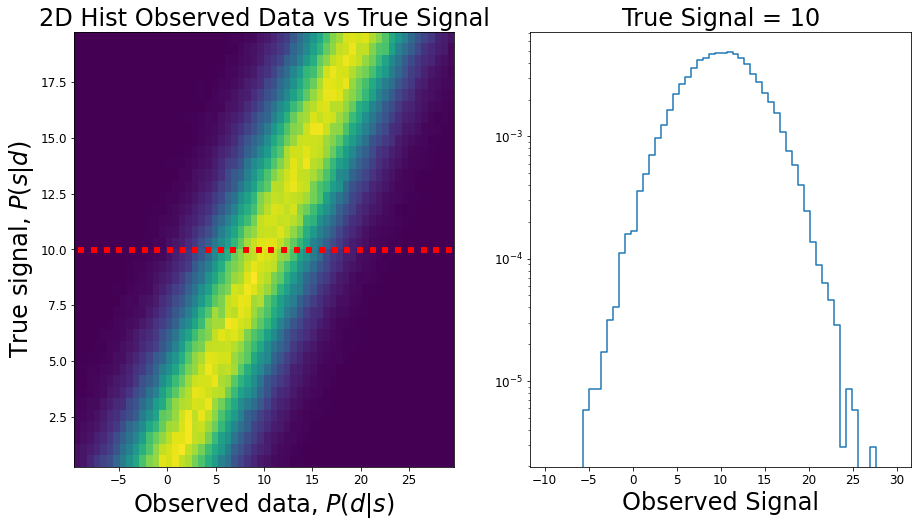

In [3]:
# Psd is the probability of each box in the 2D histogram
# the row index in Psd is the x value, which represents a column of data
# the column index in Psd is the y value, which represents a row of data
# temp and temp2 are the data edges for x axis and y axis respectively
# 20th element in every column is probability for true signal=10 since range of true signal is 0 to 20
p_sig_10 = Psd[:, 20]

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# plot 2D hist
Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
ax[0].pcolormesh(datacenters,signalcenters,Psd.T)
ax[0].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[0].set_title('2D Hist Observed Data vs True Signal', fontsize = 24)

# plot red dotted line
x = np.linspace(-9, 29, 30)
y = [10] * 30
ax[0].plot(x, y, 'rs', markersize=5)

# plot using datacenters
dc_sig_10 = datacenters
ax[1].step(dc_sig_10, p_sig_10)
ax[1].set_yscale('log')
ax[1].set_title('True Signal = 10', fontsize=24)
ax[1].set_xlabel('Observed Signal', fontsize=24)

#### Problem 1b: Interpretation
If we choose a true signal of 10, the observed signal follows a probability distribution as shown in the graph on the right.

#### Problem 1c
Select an observed data value and plot  P(s|d) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

In [4]:
print(temp[30])
print(temp[29])

10.338983050847457
9.66101694915254


Text(0.5, 0, 'True Signal')

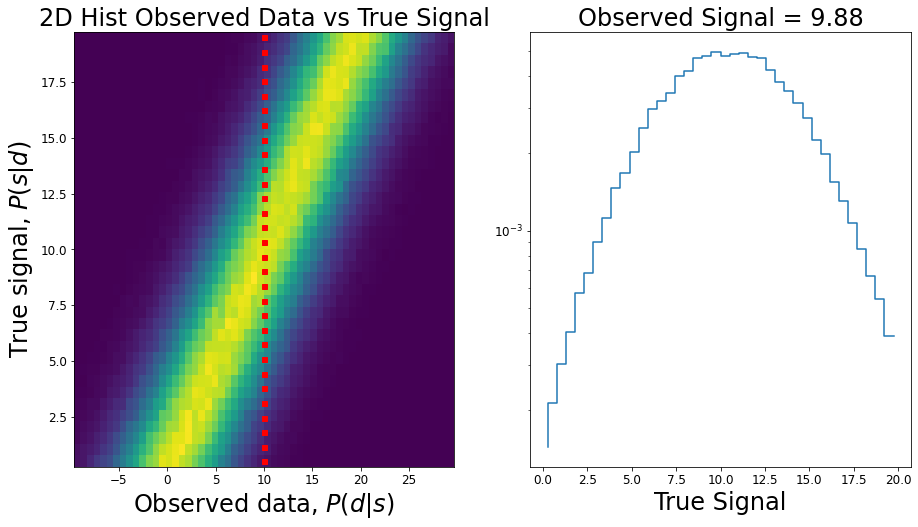

In [5]:
p_obs_9_88 = Psd[30, :]

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# plot 2D hist
Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
ax[0].pcolormesh(datacenters,signalcenters,Psd.T)
ax[0].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[0].set_title('2D Hist Observed Data vs True Signal', fontsize = 24)

# plot red dotted line
x = [9.98] * 30
y = np.linspace(0.5, 19.5, 30)
ax[0].plot(x, y, 'rs', markersize=5)

# plot using signalcenters
sc_obs_9_88 = signalcenters
ax[1].step(sc_obs_9_88, p_obs_9_88)
ax[1].set_yscale('log')
ax[1].set_title('Observed Signal = 9.88', fontsize=24)
ax[1].set_xlabel('True Signal', fontsize=24)

#### Problem 1c: Interpretation
Given the observed value of 9.88, the true signal follows a probability distribution as shown in the graph on the right.

### Problem 2
Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of  σ ]. Reproduce the graphs above. Lastly overplot the  P(d|s)  and  P(s|d)  plots. Why are they not centered on the same value? Explain carefully.

-5.7405854449712646
49.67863483038567


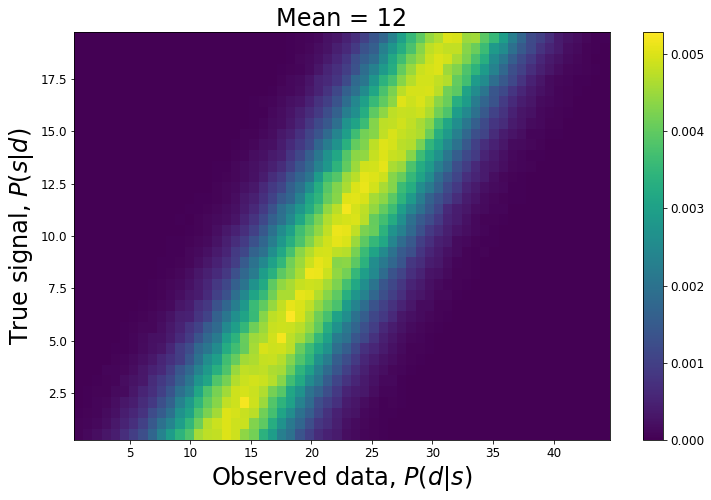

In [6]:
bkgd = stats.norm.rvs(loc=12, scale=4, size=int(1e6))
signal = stats.uniform.rvs(loc=0, scale=20, size=int(1e6))
data = bkgd + signal

print(min(data))
print(max(data))

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(0,45,60)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.title('Mean = 12', fontsize = 24)
plt.colorbar()

Text(0.5, 0, 'Observed Signal')

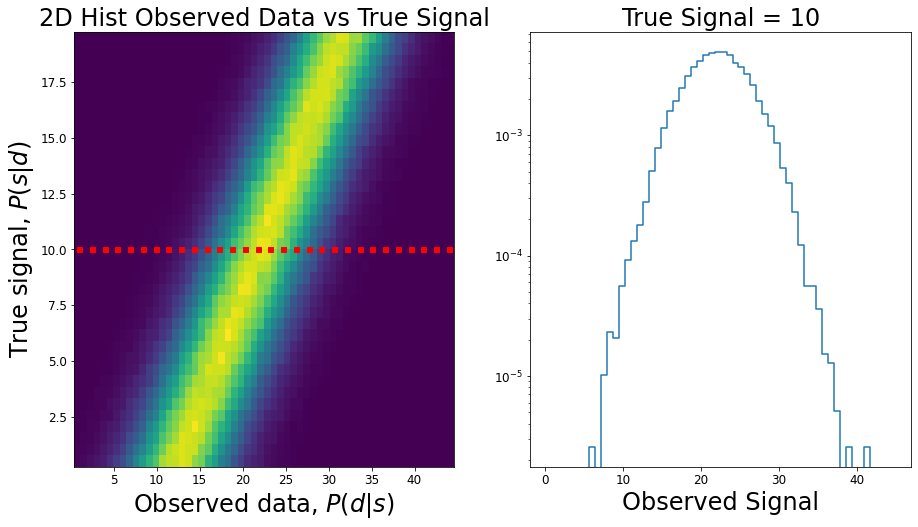

In [7]:
p_sig_10_m12 = Psd[:, 20]

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# plot 2D hist
Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
ax[0].pcolormesh(datacenters,signalcenters,Psd.T)
ax[0].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[0].set_title('2D Hist Observed Data vs True Signal', fontsize = 24)

# plot red dotted line
x = np.linspace(1, 44, 30)
y = [10] * 30
ax[0].plot(x, y, 'rs', markersize=5)

# plot using datacenters
dc_sig_10_m12 = datacenters
ax[1].step(dc_sig_10_m12, p_sig_10_m12)
ax[1].set_yscale('log')
ax[1].set_title('True Signal = 10', fontsize=24)
ax[1].set_xlabel('Observed Signal', fontsize=24)

Text(0.5, 0, 'True Signal')

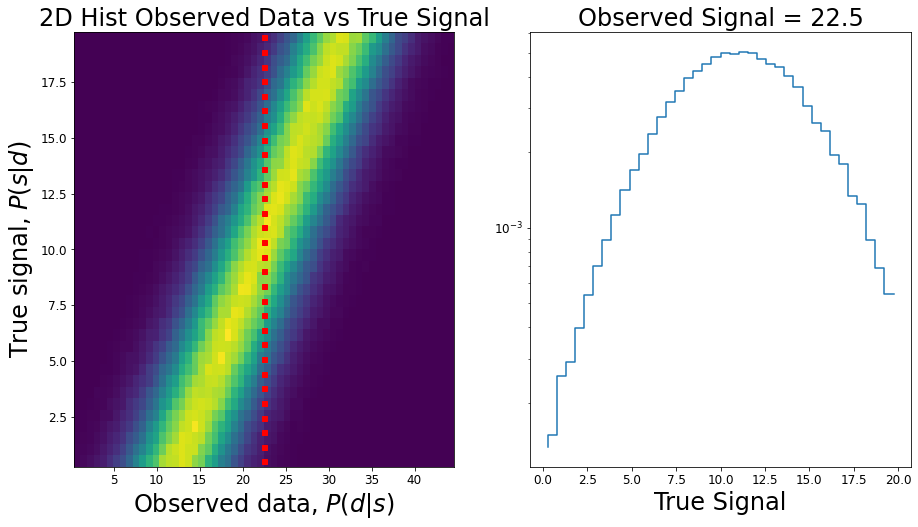

In [12]:
p_obs_22_5_m12 = Psd[30, :]

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# plot 2D hist
Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
ax[0].pcolormesh(datacenters,signalcenters,Psd.T)
ax[0].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[0].set_title('2D Hist Observed Data vs True Signal', fontsize = 24)

# plot red dotted line
x = [22.5] * 30
y = np.linspace(0.5, 19.5, 30)
ax[0].plot(x, y, 'rs', markersize=5)

# plot using datacenters
sc_obs_22_5_m12 = signalcenters
ax[1].step(sc_obs_22_5_m12, p_obs_22_5_m12)
ax[1].set_yscale('log')
ax[1].set_title('Observed Signal = 22.5', fontsize=24)
ax[1].set_xlabel('True Signal', fontsize=24)

In [13]:
print(temp[30])
print(temp[29])

22.881355932203387
22.11864406779661


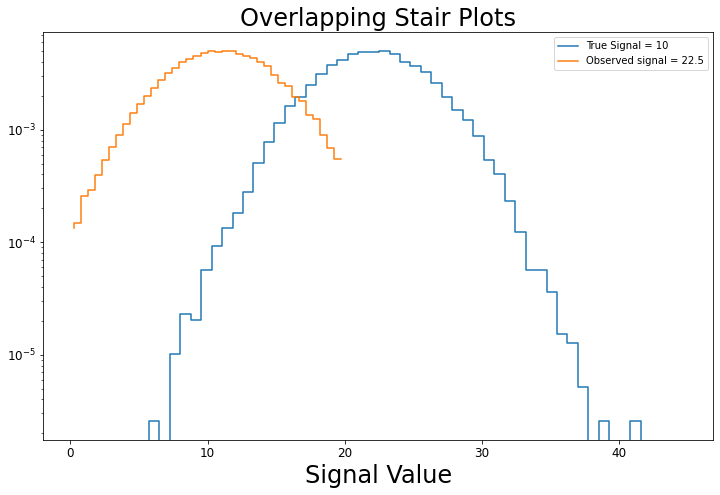

In [18]:
plt.step(dc_sig_10_m12, p_sig_10_m12, label='True Signal = 10')
plt.step(sc_obs_22_5_m12, p_obs_22_5_m12, label='Observed signal = 22.5')
plt.yscale('log')
plt.title('Overlapping Stair Plots', fontsize=24)
plt.xlabel('Signal Value', fontsize=24)
plt.legend()

Because the mean of the background shifted substantially, when we choose the same value for the true signal, the observed signal distribution shifts a lot. However, when we choose a medium value for the observed signal, the distribution for the probability distribution of the true signal still spreads out around a value of 10.

Text(0.5, 0, 'True Signal')

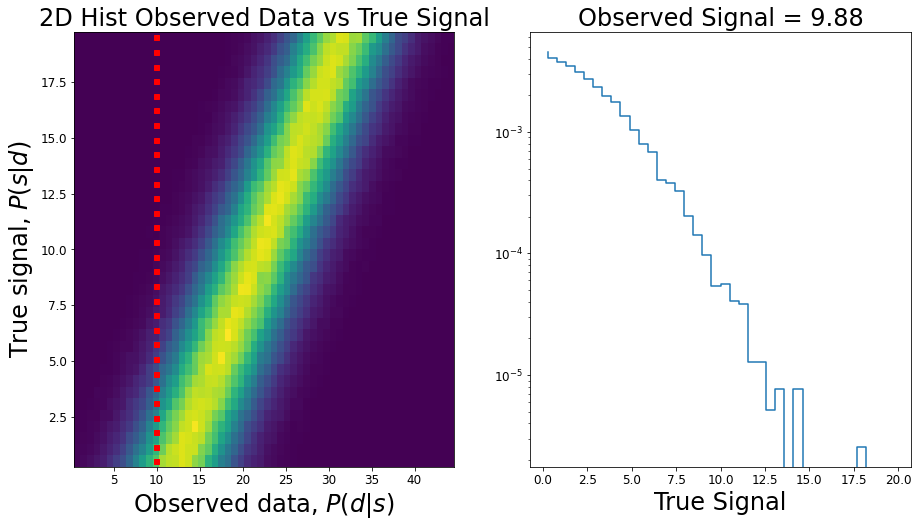

In [27]:
p_obs_9_88_m12 = Psd[13, :]

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# plot 2D hist
Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
ax[0].pcolormesh(datacenters,signalcenters,Psd.T)
ax[0].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[0].set_title('2D Hist Observed Data vs True Signal', fontsize = 24)

# plot red dotted line
x = [9.88] * 30
y = np.linspace(0.5, 19.5, 30)
ax[0].plot(x, y, 'rs', markersize=5)

# plot using datacenters
sc_obs_9_88_m12 = signalcenters
ax[1].step(sc_obs_9_88_m12, p_obs_9_88_m12)
ax[1].set_yscale('log')
ax[1].set_title('Observed Signal = 9.88', fontsize=24)
ax[1].set_xlabel('True Signal', fontsize=24)

In [24]:
print(temp[13])
print(temp[12])

9.915254237288135
9.152542372881356


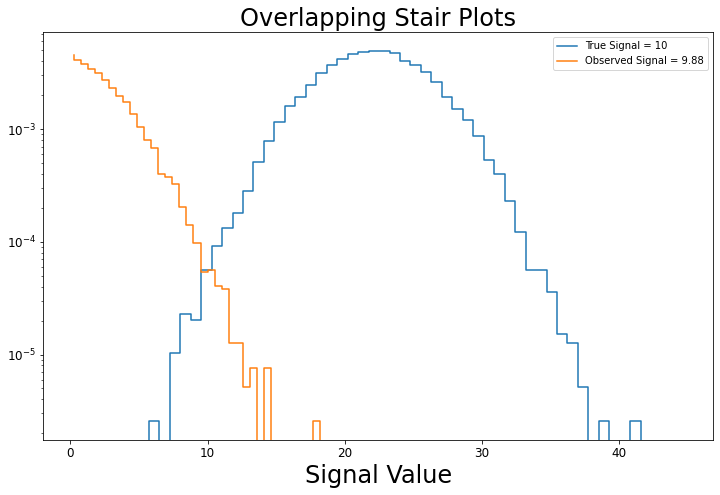

In [29]:
plt.step(dc_sig_10_m12, p_sig_10_m12, label='True Signal = 10')
plt.step(sc_obs_9_88_m12, p_obs_9_88_m12, label='Observed Signal = 9.88')
plt.yscale('log')
plt.title('Overlapping Stair Plots', fontsize=24)
plt.xlabel('Signal Value', fontsize=24)
plt.legend()

If we choose the original value of observed signal, then the difference between the centers of these two probability distributions becomes even greater due to the shift in the mean of the background, so the vertical slice crosses a much lower slice compared to the first background.